# Final Project IMLP456 學生成績

## 下載資料、函式庫、分析圖等

In [72]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, RocCurveDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('data/test_scores.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
df['target'] = ((df['pretest'] + df['posttest']) / 2 >= 60).astype(int)

In [5]:
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
2128    0
2129    0
2130    0
2131    0
2132    0
Name: target, Length: 2133, dtype: int32

In [6]:
df.info()
"""
school: 學校代碼
school_setting: 學校區域(市區/非市區)
school_type: 學校類型(公立/私立)
classroom: 班級代碼
teaching_method: 教學方法(傳統式/創新式)
n_students: 班級人數
student_id: 學生代碼
gender: 性別
lunch: 午餐類型(免/不免)
pretest: 前測成績
posttest: 後測成績
target: 學生前後平均成績是否及格(及格/不及格)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
 11  target           2133 non-null   int32  
dtypes: float64(3), int32(1), object(8)
memory usage: 191.8+ KB


'\nschool: 學校代碼\nschool_setting: 學校區域(市區/非市區)\nschool_type: 學校類型(公立/私立)\nclassroom: 班級代碼\nteaching_method: 教學方法(傳統式/創新式)\nn_students: 班級人數\nstudent_id: 學生代碼\ngender: 性別\nlunch: 午餐類型(免/不免)\npretest: 前測成績\nposttest: 後測成績\ntarget: 學生前後平均成績是否及格(及格/不及格)\n'

In [7]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,target
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,1
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,1
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,1
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,1
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,1


* #### 形狀

In [8]:
df.shape

(2133, 12)

* #### columns
|columns|meaning|
|:---|:---|
|school: |學校代碼|
|school_setting: |學校區域(市區/非市區)|
|school_type: |學校類型(公立/私立)|
|classroom: |班級代碼|
|teaching_method: |教學方法(傳統式/創新式)|
|n_students: |班級人數|
|student_id: |學生代碼|
|gender: |性別|
|lunch: |午餐類型(免/不免)|
|pretest: |前測成績|
|posttest: |後測成績|
|target: |學生前後平均成績是否及格(及格/不及格)|

In [9]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest', 'target'],
      dtype='object')

In [10]:
df.describe()

,n_student,pretest,posttest,target
count,2133.000000,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203,0.547117
std,4.228893,13.563101,13.986789,0.497892
min,14.000000,22.000000,32.000000,0.000000
25%,20.000000,44.000000,56.000000,0.000000
50%,22.000000,56.000000,68.000000,1.000000
75%,27.000000,65.000000,77.000000,1.000000
max,31.000000,93.000000,100.000000,1.000000


In [11]:
labels = df["target"].value_counts()

([<matplotlib.patches.Wedge at 0x1783c5e1e50>,
 [Text(-0.16222988306034233, 1.0879712611288166, 'Fail'),
  Text(0.17697816537115924, -1.186877722843368, 'Pass')],
 [Text(-0.08848902712382307, 0.5934388697066272, '54.7%'),
  Text(0.1032372631331762, -0.6923453383252979, '45.3%')])

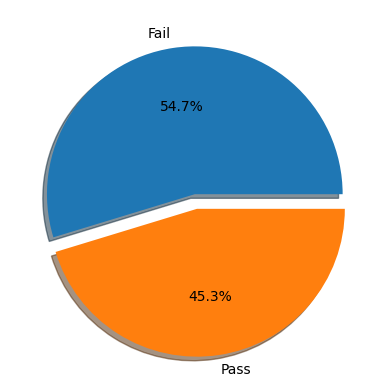

In [12]:
plt.pie(labels, labels = ['Fail','Pass'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True)

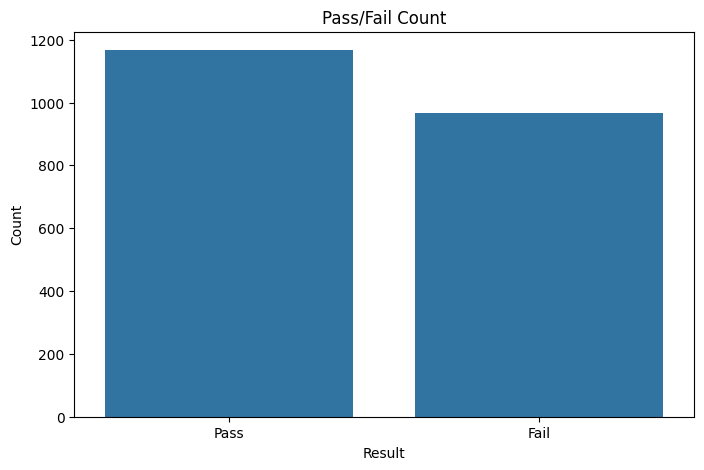

In [13]:
# pass, fail ratio(pfr)

df_pfr = df["target"].map({0: 'Fail', 1: 'Pass'})
plt.figure(figsize=(8,5))
sns.countplot(x=df_pfr)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Pass/Fail Count')
plt.show()

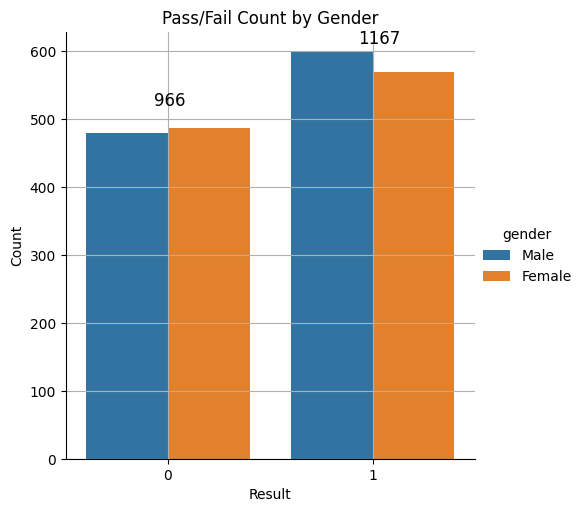

In [14]:
# 考試通過比例(性別區分)
sns.catplot(x = "target", hue = "gender", kind = "count", data = df)
plt.title('Pass/Fail Count by Gender')
plt.xlabel('Result')
plt.ylabel('Count')
plt.grid()
plt.text(-0.07, 520, labels[0], fontsize=12)
plt.text(0.93, 610, labels[1], fontsize=12)
plt.show()

## 區分訓練集與測試集

In [15]:
x = df.drop(columns=['target', 'pretest', 'posttest', 'student_id'], axis=1)
y = df['target']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
x_train.shape

(1493, 8)

In [18]:
x_train.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch
614,GJJHK,Suburban,Public,ZDT,Standard,27.0,Male,Qualifies for reduced/free lunch
1732,VHDHF,Rural,Non-public,KR1,Experimental,15.0,Female,Qualifies for reduced/free lunch
861,IDGFP,Urban,Non-public,98D,Experimental,21.0,Female,Does not qualify
1083,KZKKE,Rural,Public,QTU,Standard,23.0,Female,Qualifies for reduced/free lunch
371,DNQDD,Suburban,Public,PW5,Experimental,20.0,Female,Does not qualify


In [19]:
y_train.head()

614     0
1732    0
861     1
1083    0
371     0
Name: target, dtype: int32

## 模型

In [20]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold, cross_validate
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline

def search_best_model(models, x_train, y_train):
    # 找出文字欄位 / 數值欄位（x_train 是 DataFrame 時）
    cat_cols = x_train.select_dtypes(include=['object', 'category']).columns
    num_cols = x_train.select_dtypes(exclude=['object', 'category']).columns

    pre = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )

    best_model = None
    best_f1 = -1

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        pipe = Pipeline([('pre', pre), ('model', model)])

        cvres = cross_validate(
            pipe, x_train, y_train, cv=kf,
            scoring={'acc':'accuracy', 'f1':'f1_macro'}   # multiclass 就用 macro/weighted
        )
        avg_acc = cvres['test_acc'].mean()
        avg_f1 = cvres['test_f1'].mean()
        print(f"{name} Acc: {avg_acc:.4f}, F1: {avg_f1:.4f}")

        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_model = pipe

    return best_model

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Extra Trees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Knn': KNeighborsClassifier()
}
best_model = search_best_model(models, x_train, y_train)
best_pipeline = best_model
best_clf = best_pipeline.named_steps['model']
print("best_model:", best_clf)

Logistic Regression Acc: 0.9612, F1: 0.9607
Decision Tree Acc: 0.9612, F1: 0.9608
Random Forest Acc: 0.9585, F1: 0.9581
SVC Acc: 0.8198, F1: 0.8165
Extra Trees Acc: 0.9625, F1: 0.9621
AdaBoost Acc: 0.9612, F1: 0.9607
Knn Acc: 0.9598, F1: 0.9594
best_model: ExtraTreesClassifier()


### ColumnTransformer

In [76]:
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns
num_cols = x_train.select_dtypes(exclude=['object', 'category']).columns
Extra_Trees_pre = ColumnTransformer(
	transformers=[
		('num', 'passthrough', num_cols),
		('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
	]
)
KNeighbors_pre = ColumnTransformer(
	transformers=[
     ('num', StandardScaler(), num_cols), 
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)]
)
SVC_pre = KNeighbors_pre

* #### ExtraTrees

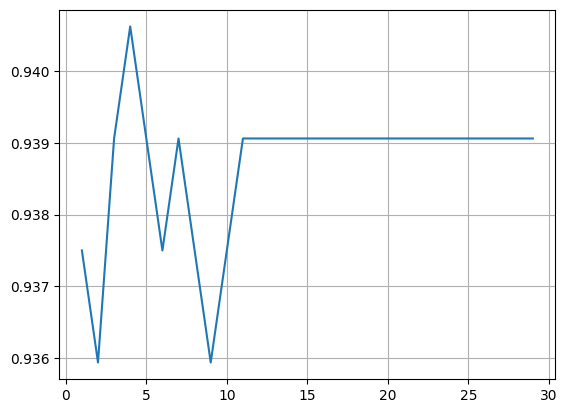

0.940625
best i = 4


In [ ]:
pre = Extra_Trees_pre
accuracy = []

for i in range(1, 30):
	model = Pipeline(steps=[
		('pre', pre),
		('model', ExtraTreesClassifier(n_estimators=i, random_state=42))
	])
	model.fit(x_train, y_train)
	y_pred = model.predict(x_test)
	accuracy.append(accuracy_score(y_test, y_pred))

i_range = range(1, 30)
plt.plot(i_range, accuracy)
plt.grid()
plt.show()
print(max(accuracy))
print("best i =",accuracy.index(max(accuracy))+1)

* #### SVC

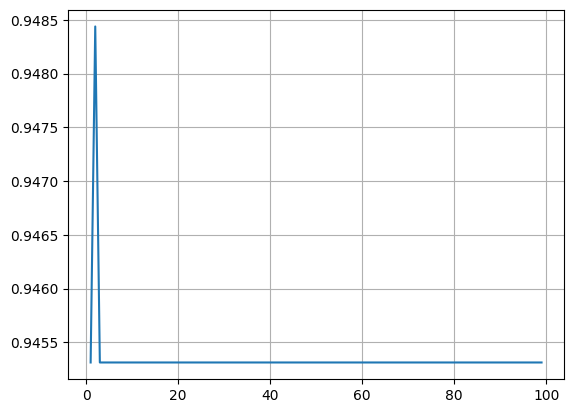

0.9484375
best i = 2


In [77]:
pre = SVC_pre
accuracy = []

for i in range(1, 100):
	model = Pipeline(steps=[
		('pre', pre),
		('model', SVC(C=i, random_state=42))
	])
	model.fit(x_train, y_train)
	y_pred = model.predict(x_test)
	accuracy.append(accuracy_score(y_test, y_pred))

i_range = range(1, 100)
plt.plot(i_range, accuracy)
plt.grid()
plt.show()
print(max(accuracy))
print("best i =",accuracy.index(max(accuracy))+1)

* #### KNN

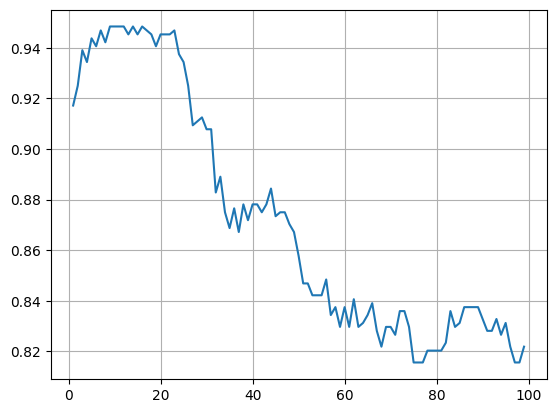

0.9484375
best i = 9


In [53]:
pre = KNeighbors_pre
accuracy = []

for i in range(1, 100):
	model = Pipeline(steps=[
		('pre', pre),
		('model', KNeighborsClassifier(n_neighbors=i))
	])
	model.fit(x_train, y_train)
	y_pred = model.predict(x_test)
	accuracy.append(accuracy_score(y_test, y_pred))

i_range = range(1, 100)
plt.plot(i_range, accuracy)
plt.grid()
plt.show()
print(max(accuracy))
print("best i =",accuracy.index(max(accuracy))+1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       282
           1       0.85      0.83      0.84       358

    accuracy                           0.82       640
   macro avg       0.82      0.82      0.82       640
weighted avg       0.82      0.82      0.82       640



## 畫圖 

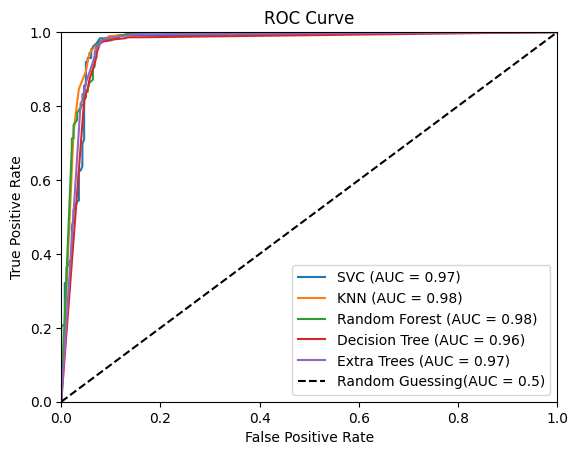

In [73]:
SVC_model = Pipeline(steps=[
    ('pre', KNeighbors_pre),
    ('model', SVC())
])
SVC_model.fit(x_train, y_train)
ax = plt.gca()

KNN_model = Pipeline(steps=[
    ('pre', KNeighbors_pre),
    ('model', KNeighborsClassifier(n_neighbors=9))
])
KNN_model.fit(x_train, y_train)
ax = plt.gca()

RandomForest_model = Pipeline(steps=[
    ('pre', RandomForest_pre),
    ('model', RandomForestClassifier(n_estimators=98, random_state=42))
])
RandomForest_model.fit(x_train, y_train)
ax = plt.gca()

DecisionTree_model = Pipeline(steps=[
    ('pre', Extra_Trees_pre),
    ('model', DecisionTreeClassifier())
])
DecisionTree_model.fit(x_train, y_train)
ax = plt.gca()

ExtraTrees_model = Pipeline(steps=[
    ('pre', Extra_Trees_pre),
    ('model', ExtraTreesClassifier(n_estimators=4, random_state=42))
])
ExtraTrees_model.fit(x_train, y_train)
ax = plt.gca()

plt.title('ROC Curve')
SVC_model_disp = RocCurveDisplay.from_estimator(SVC_model, x_test, y_test, ax=ax, name ='SVC')
KNN_model_disp = RocCurveDisplay.from_estimator(KNN_model, x_test, y_test, ax=ax, name='KNN')
RandomForest_model_disp = RocCurveDisplay.from_estimator(RandomForest_model, x_test, y_test, ax=ax, name='Random Forest')
DecisionTree_model_disp = RocCurveDisplay.from_estimator(DecisionTree_model, x_test, y_test, ax=ax, name='Decision Tree')
ExtraTrees_model_disp = RocCurveDisplay.from_estimator(ExtraTrees_model, x_test, y_test, ax=ax, name='Extra Trees')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing(AUC = 0.5)')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 預測

In [26]:
ExtraTrees_model.score(x_test, y_test)

0.940625

In [27]:
RandomForest_model.score(x_test, y_test)

0.946875

In [28]:
# ET
ExtraTrees_model_y_pred = ExtraTrees_model.predict(x_test)
print(ExtraTrees_model_y_pred)
# RF
RandomForest_model_y_pred = RandomForest_model.predict(x_test)
print(RandomForest_model_y_pred)

[0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 

In [29]:
y_test.values

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [30]:
# KNN
KNN_model_x_pred = KNN_model.predict(x_test)
print(KNN_model_x_pred)

[0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 1 0 0 

### Error Rate Research

In [31]:
df_c = df
df_c

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,target
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,1
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,1
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,1
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,1
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0,0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0,0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0,0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0,0


In [60]:
error_rate = []

for i in range(1, 100):
    RandomForest_emister = Pipeline(steps=[
    ('pre', RandomForest_pre),
    ('model', RandomForestClassifier(n_estimators=i, random_state=42))])
    RandomForest_emister.fit(x_train, y_train)
    rfr_y_pred = RandomForest_emister.predict(x_test)
    error_rate.append(np.mean(rfr_y_pred != y_test))

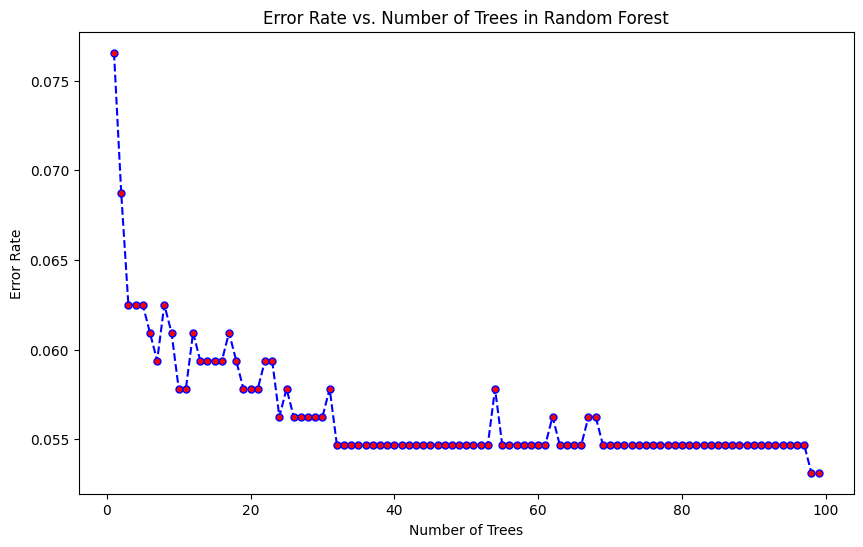

In [64]:
plt.figure(figsize=(10,6))
# Plotting the error rate vs. number of trees
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.show()

In [66]:
error_rate_extra_trees = []

for i in range(1, 100):
    ExtraTrees_emister = Pipeline(steps=[
    ('pre', Extra_Trees_pre),
    ('model', ExtraTreesClassifier(n_estimators=i, random_state=42))])
    ExtraTrees_emister.fit(x_train, y_train)
    rfr_y_pred = ExtraTrees_emister.predict(x_test)
    error_rate_extra_trees.append(np.mean(rfr_y_pred != y_test))

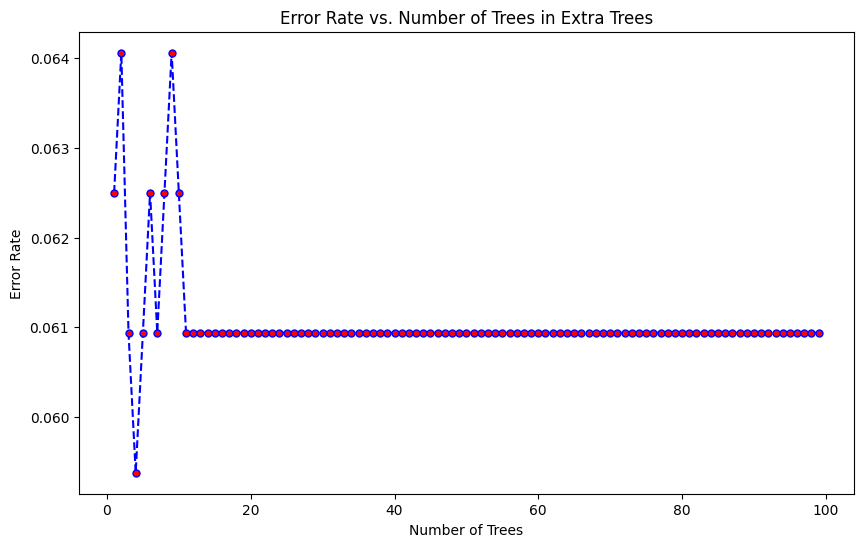

In [67]:
plt.figure(figsize=(10,6))
# Plotting the error rate vs. number of trees
plt.plot(range(1,100), error_rate_extra_trees, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. Number of Trees in Extra Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.show()

In [68]:
error_rate_KNN = []

for i in range(1, 100):
    KNN_emister = Pipeline(steps=[
    ('pre', KNeighbors_pre),
    ('model', KNeighborsClassifier(n_neighbors=i))])
    KNN_emister.fit(x_train, y_train)
    rfr_y_pred = KNN_emister.predict(x_test)
    error_rate_KNN.append(np.mean(rfr_y_pred != y_test))

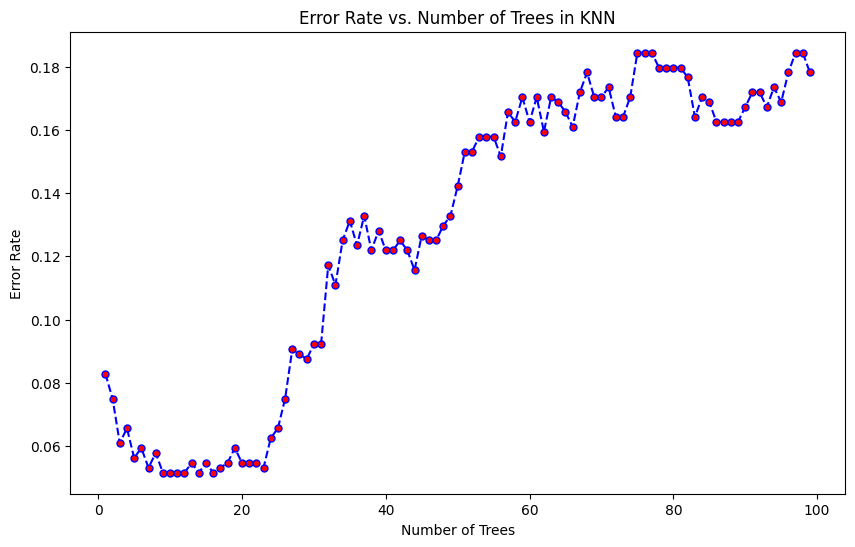

In [69]:
plt.figure(figsize=(10,6))
# Plotting the error rate vs. number of trees
plt.plot(range(1,100), error_rate_KNN, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. Number of Trees in KNN')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.show()

## Accuracy Check And Best Model(advance)

In [75]:
def search_best_model(models, x_train, y_train):
    # 找出文字欄位 / 數值欄位（x_train 是 DataFrame 時）
    cat_cols = x_train.select_dtypes(include=['object', 'category']).columns
    num_cols = x_train.select_dtypes(exclude=['object', 'category']).columns

    best_model = None
    best_f1 = -1

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        if model in [ExtraTreesClassifier, DecisionTreeClassifier, RandomForestClassifier]:
            pre = ColumnTransformer(
                transformers=[
                    ('num', 'passthrough', num_cols),
                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                ]
            )
        else:
            pre = ColumnTransformer(
                transformers=[
                    ('num', StandardScaler(), num_cols),
                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                ]
            )
        pipe = Pipeline([('pre', pre), ('model', model)])

        cvres = cross_validate(
            pipe, x_train, y_train, cv=kf,
            scoring={'acc':'accuracy', 'f1':'f1_macro'}   # multiclass 就用 macro/weighted
        )
        avg_acc = cvres['test_acc'].mean()
        avg_f1 = cvres['test_f1'].mean()
        print(f"{name} Acc: {avg_acc:.4f}, F1: {avg_f1:.4f}")

        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_model = pipe

    return best_model

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=98),
    'SVC': SVC(),
    'Extra Trees': ExtraTreesClassifier(n_estimators=4),
    'AdaBoost': AdaBoostClassifier(),
    'Knn': KNeighborsClassifier(n_neighbors=9)
}
best_model = search_best_model(models, x_train, y_train)
best_pipeline = best_model
best_clf = best_pipeline.named_steps['model']
print("best_model:", best_clf)

Logistic Regression Acc: 0.9598, F1: 0.9594
Decision Tree Acc: 0.9612, F1: 0.9608
Random Forest Acc: 0.9592, F1: 0.9588
SVC Acc: 0.9632, F1: 0.9628
Extra Trees Acc: 0.9585, F1: 0.9581
AdaBoost Acc: 0.9612, F1: 0.9607
Knn Acc: 0.9625, F1: 0.9621
best_model: SVC()
